In [3]:
%matplotlib inline

import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt
import urllib
import ssl
import io
import os
from pandasql import sqldf, load_meat, load_births

ImportError: No module named 'stumpy'

In [2]:
def change_plot_size(width, height, plt):
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = width
    fig_size[1] = height
    plt.rcParams["figure.figsize"] = fig_size
    plt.rcParams['xtick.direction'] = 'out'

change_plot_size(20, 6, plt)

In [3]:
steam_df = pd.read_csv('steamgen.csv')
# steam_df = pd.read_csv('D:\Projects\Add hoc Tasks\Data\GSPC\Data.csv')

In [4]:
# steam_df.columns

In [5]:
# colname = 'Open'
# title = 'GSPC'

colname = 'steam flow'
title = 'Steamgen'

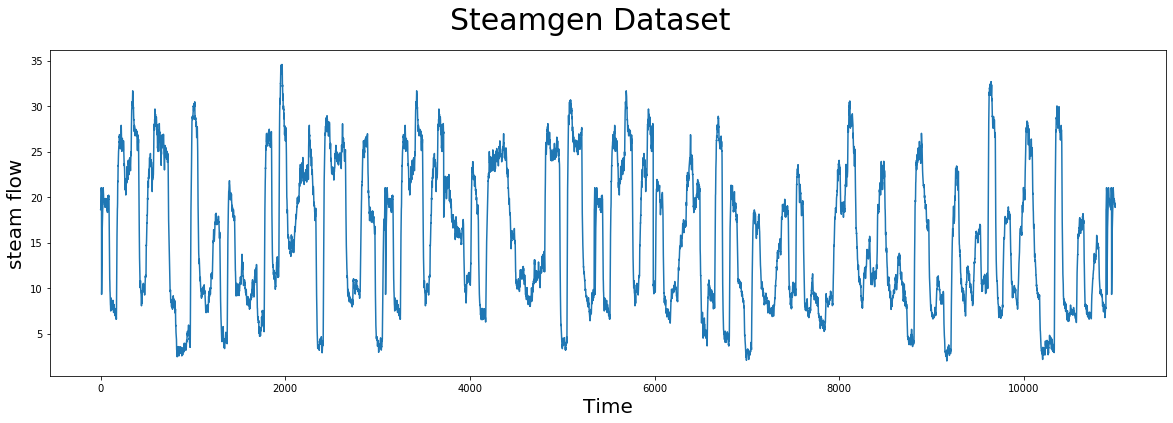

In [6]:
plt.suptitle(title + ' Dataset', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel(colname, fontsize='20')
plt.plot(steam_df[colname].values)

In [7]:
start = 10
end = 125

steam_df_searh = steam_df[start:end]

In [8]:
# steam_df_searh

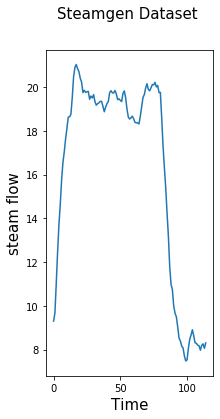

In [9]:
change_plot_size(3, 6, plt)
plt.suptitle(title +' Dataset', fontsize='15')
plt.xlabel('Time', fontsize ='15')
plt.ylabel(colname, fontsize='15')
plt.plot(steam_df_searh[colname].values)

In [10]:
m = end - start
mp = stumpy.stump(steam_df_searh[colname], m, steam_df[colname],ignore_trivial = False)

In [11]:
indx = range(0,len( mp[:, 0]))
dataset = pd.DataFrame({'Column1': mp[:, 0], 'Column2': mp[:, 1], 'Column3': mp[:, 2], 'Column4': mp[:, 3], 'Index': indx})

In [12]:
pysqldf = lambda q: sqldf(q, globals())
df_res = pysqldf("SELECT * FROM dataset order by Column1 Asc LIMIT 50;")

In [13]:
mp[:,0].min()

8.148087927396486e-07

In [14]:
# df_res

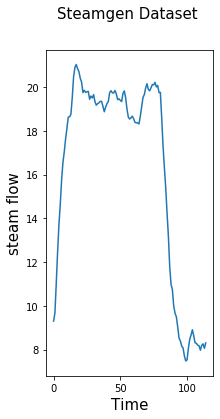

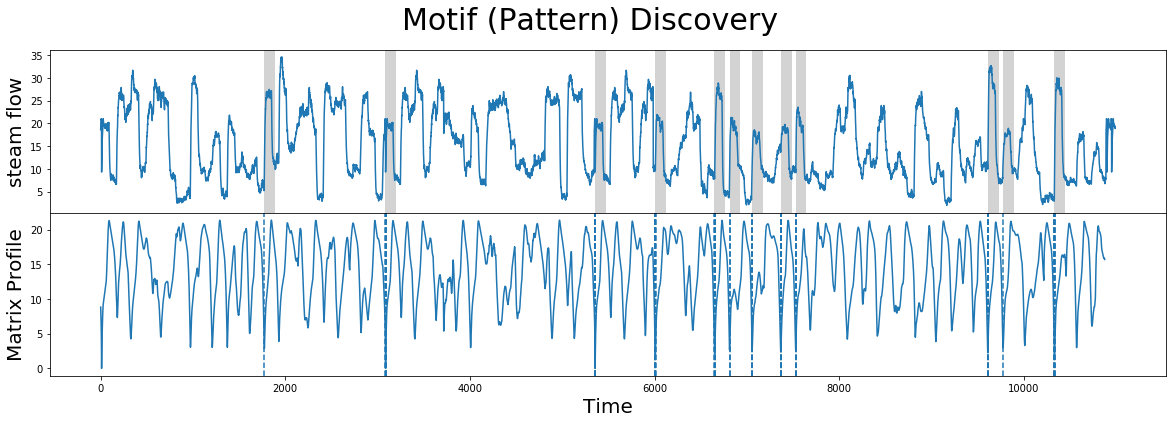

In [16]:
change_plot_size(3, 6, plt)
plt.suptitle(title +' Dataset', fontsize='15')
plt.xlabel('Time', fontsize ='15')
plt.ylabel(colname, fontsize='15')
plt.plot(steam_df_searh[colname].values)



change_plot_size(20, 6, plt)
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(steam_df[colname].values)
axs[0].set_ylabel(colname, fontsize='20')

for i,r in df_res.iterrows():    
    if r['Index']==0.0 or r['Index'] <= end :
        continue
    rect = Rectangle((r['Index'], 0), m, 40, facecolor='lightgrey')
    axs[0].add_patch(rect)

axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')

for i,r in df_res.iterrows():
    if r['Index']==0.0 or r['Index'] <= end :
        continue
    axs[1].axvline(x=r['Index'], linestyle="dashed")

axs[1].plot(mp[:, 0])

In [ ]:
dataset